In [1]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import xgboost as xgb
from time import time

In [2]:
# read data
train = pd.read_csv("./train.csv",parse_dates=[2], low_memory=False)
test = pd.read_csv("./test.csv",parse_dates=[3], low_memory=False)
store = pd.read_csv("./store.csv", low_memory=False)

In [3]:
#train
train.head().append(train.tail())

C:\Users\10021\AppData\Local\Temp\ipykernel_20872\987508117.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train.head().append(train.tail())


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [4]:
#test
test.head().append(test.tail())

C:\Users\10021\AppData\Local\Temp\ipykernel_20872\3114758290.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test.head().append(test.tail())


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1


In [5]:
#store
store.head().append(store.tail())

C:\Users\10021\AppData\Local\Temp\ipykernel_20872\3993997362.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store.head().append(store.tail())


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [6]:
# check nan
display(train.isnull().sum(),test.isnull().sum(),store.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [7]:
# test nan
test[pd.isnull(test.Open)]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


<AxesSubplot:title={'center':'Store1'}, xlabel='Date'>

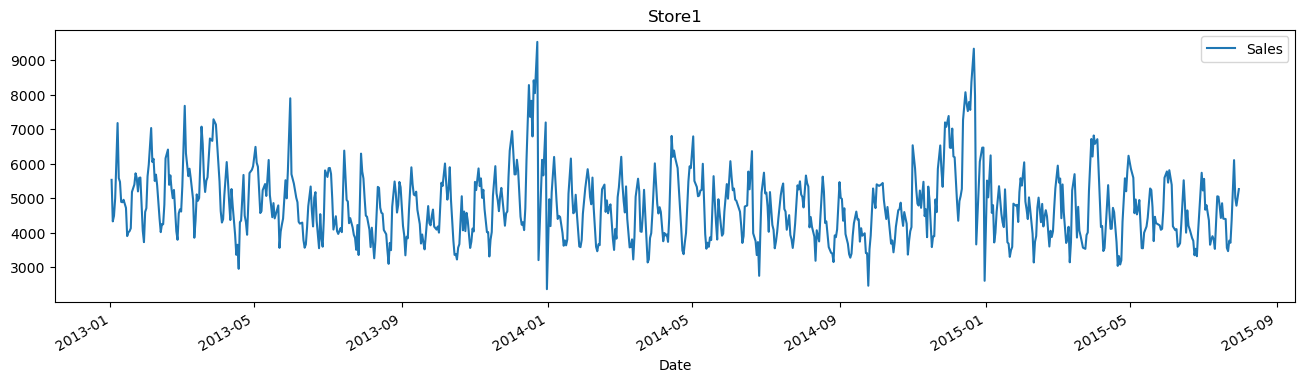

In [9]:
# sales of store1 full timne
strain = train[train.Sales>0]
strain.loc[strain['Store']==1 ,['Date','Sales']]     .plot(x='Date',y='Sales',title='Store1',figsize=(16,4))

<AxesSubplot:title={'center':'Store1'}, xlabel='Date'>

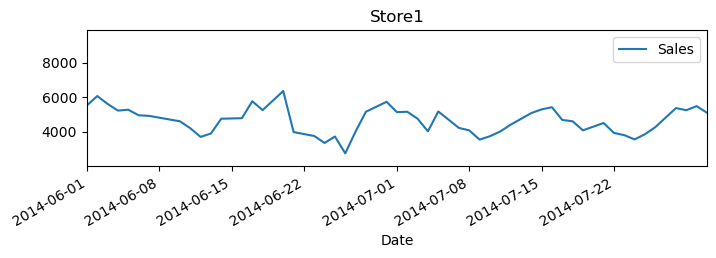

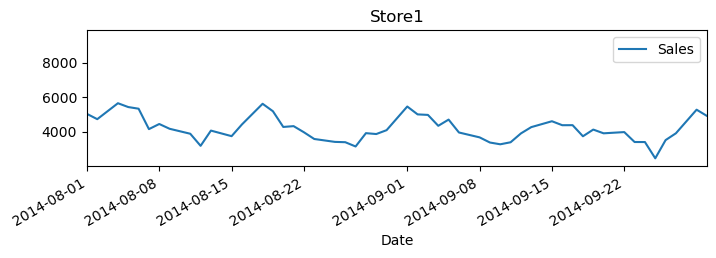

In [10]:
# sales of store1 ['2014-6-1','2014-7-31']v.s.['2014-8-1','2014-9-30']
strain = train[train.Sales>0]
strain.loc[strain['Store']==1 ,['Date','Sales']]     .plot(x='Date',y='Sales',title='Store1',figsize=(8,2),xlim=['2014-6-1','2014-7-31'])
strain.loc[strain['Store']==1 ,['Date','Sales']]     .plot(x='Date',y='Sales',title='Store1',figsize=(8,2),xlim=['2014-8-1','2014-9-30'])

In [11]:
# the store should be open in the test,so we fillna with 1
test.fillna(1, inplace=True)
#store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)
#store['CompetitionOpenScinceYear'].fillna(store['CompetitionDistance'].median(), inplace = True)
#store['CompetitionOPenScinceMonth'].fillna(store['CompetitionDistance'].median(), inplace = True)

In [12]:
# fillna in store with 0 has better result than median()
store.fillna(0, inplace=True)

In [13]:
display(train.isnull().sum(),test.isnull().sum(),store.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [14]:
train = pd.merge(train, store, on='Store')
test = pd.merge(test, store, on='Store')

In [15]:
# split the last 6 weeks data as hold-out set (idea from Gert https://www.kaggle.com/c/rossmann-store-sales/discussion/18024)
train = train.sort_values(['Date'],ascending = False)
ho_test = train[:6*7*1115]
ho_train = train[6*7*1115:]

In [16]:
# only use data of Sales>0 and Open is 1
ho_test = ho_test[ho_test["Open"] != 0]
ho_test = ho_test[ho_test["Sales"] > 0]
ho_train = ho_train[ho_train["Open"] != 0]
ho_train = ho_train[ho_train["Sales"] > 0]

In [17]:
# feature creation (code based on  https://www.kaggle.com/cast42/xgboost-in-python-with-rmspe-v2/code)
def features_create(data):
    
    
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    
    
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['DayOfWeek'] = data.Date.dt.dayofweek
    data['WeekOfYear'] = data.Date.dt.weekofyear
    
    
    
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) +         (data.Month - data.CompetitionOpenSinceMonth)
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) +         (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)        
    data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
    
    
  
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data.Month.map(month2str)
    data.loc[data.PromoInterval == 0, 'PromoInterval'] = ''
    data['IsPromoMonth'] = 0
    for interval in data.PromoInterval.unique():
        if interval != '':
            for month in interval.split(','):
                data.loc[(data.monthStr == month) & (data.PromoInterval == interval), 'IsPromoMonth'] = 1

    return data

In [18]:
features_create(ho_train)
features_create(ho_test)
features_create(test)
print('Features creation finished')

C:\Users\10021\AppData\Local\Temp\ipykernel_20872\1979239357.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['WeekOfYear'] = data.Date.dt.weekofyear


Features creation finished


C:\Users\10021\AppData\Local\Temp\ipykernel_20872\1979239357.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['WeekOfYear'] = data.Date.dt.weekofyear
C:\Users\10021\AppData\Local\Temp\ipykernel_20872\1979239357.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['WeekOfYear'] = data.Date.dt.weekofyear


In [19]:
# drop the features of not help
ho_train.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)
ho_test.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)

<AxesSubplot:>

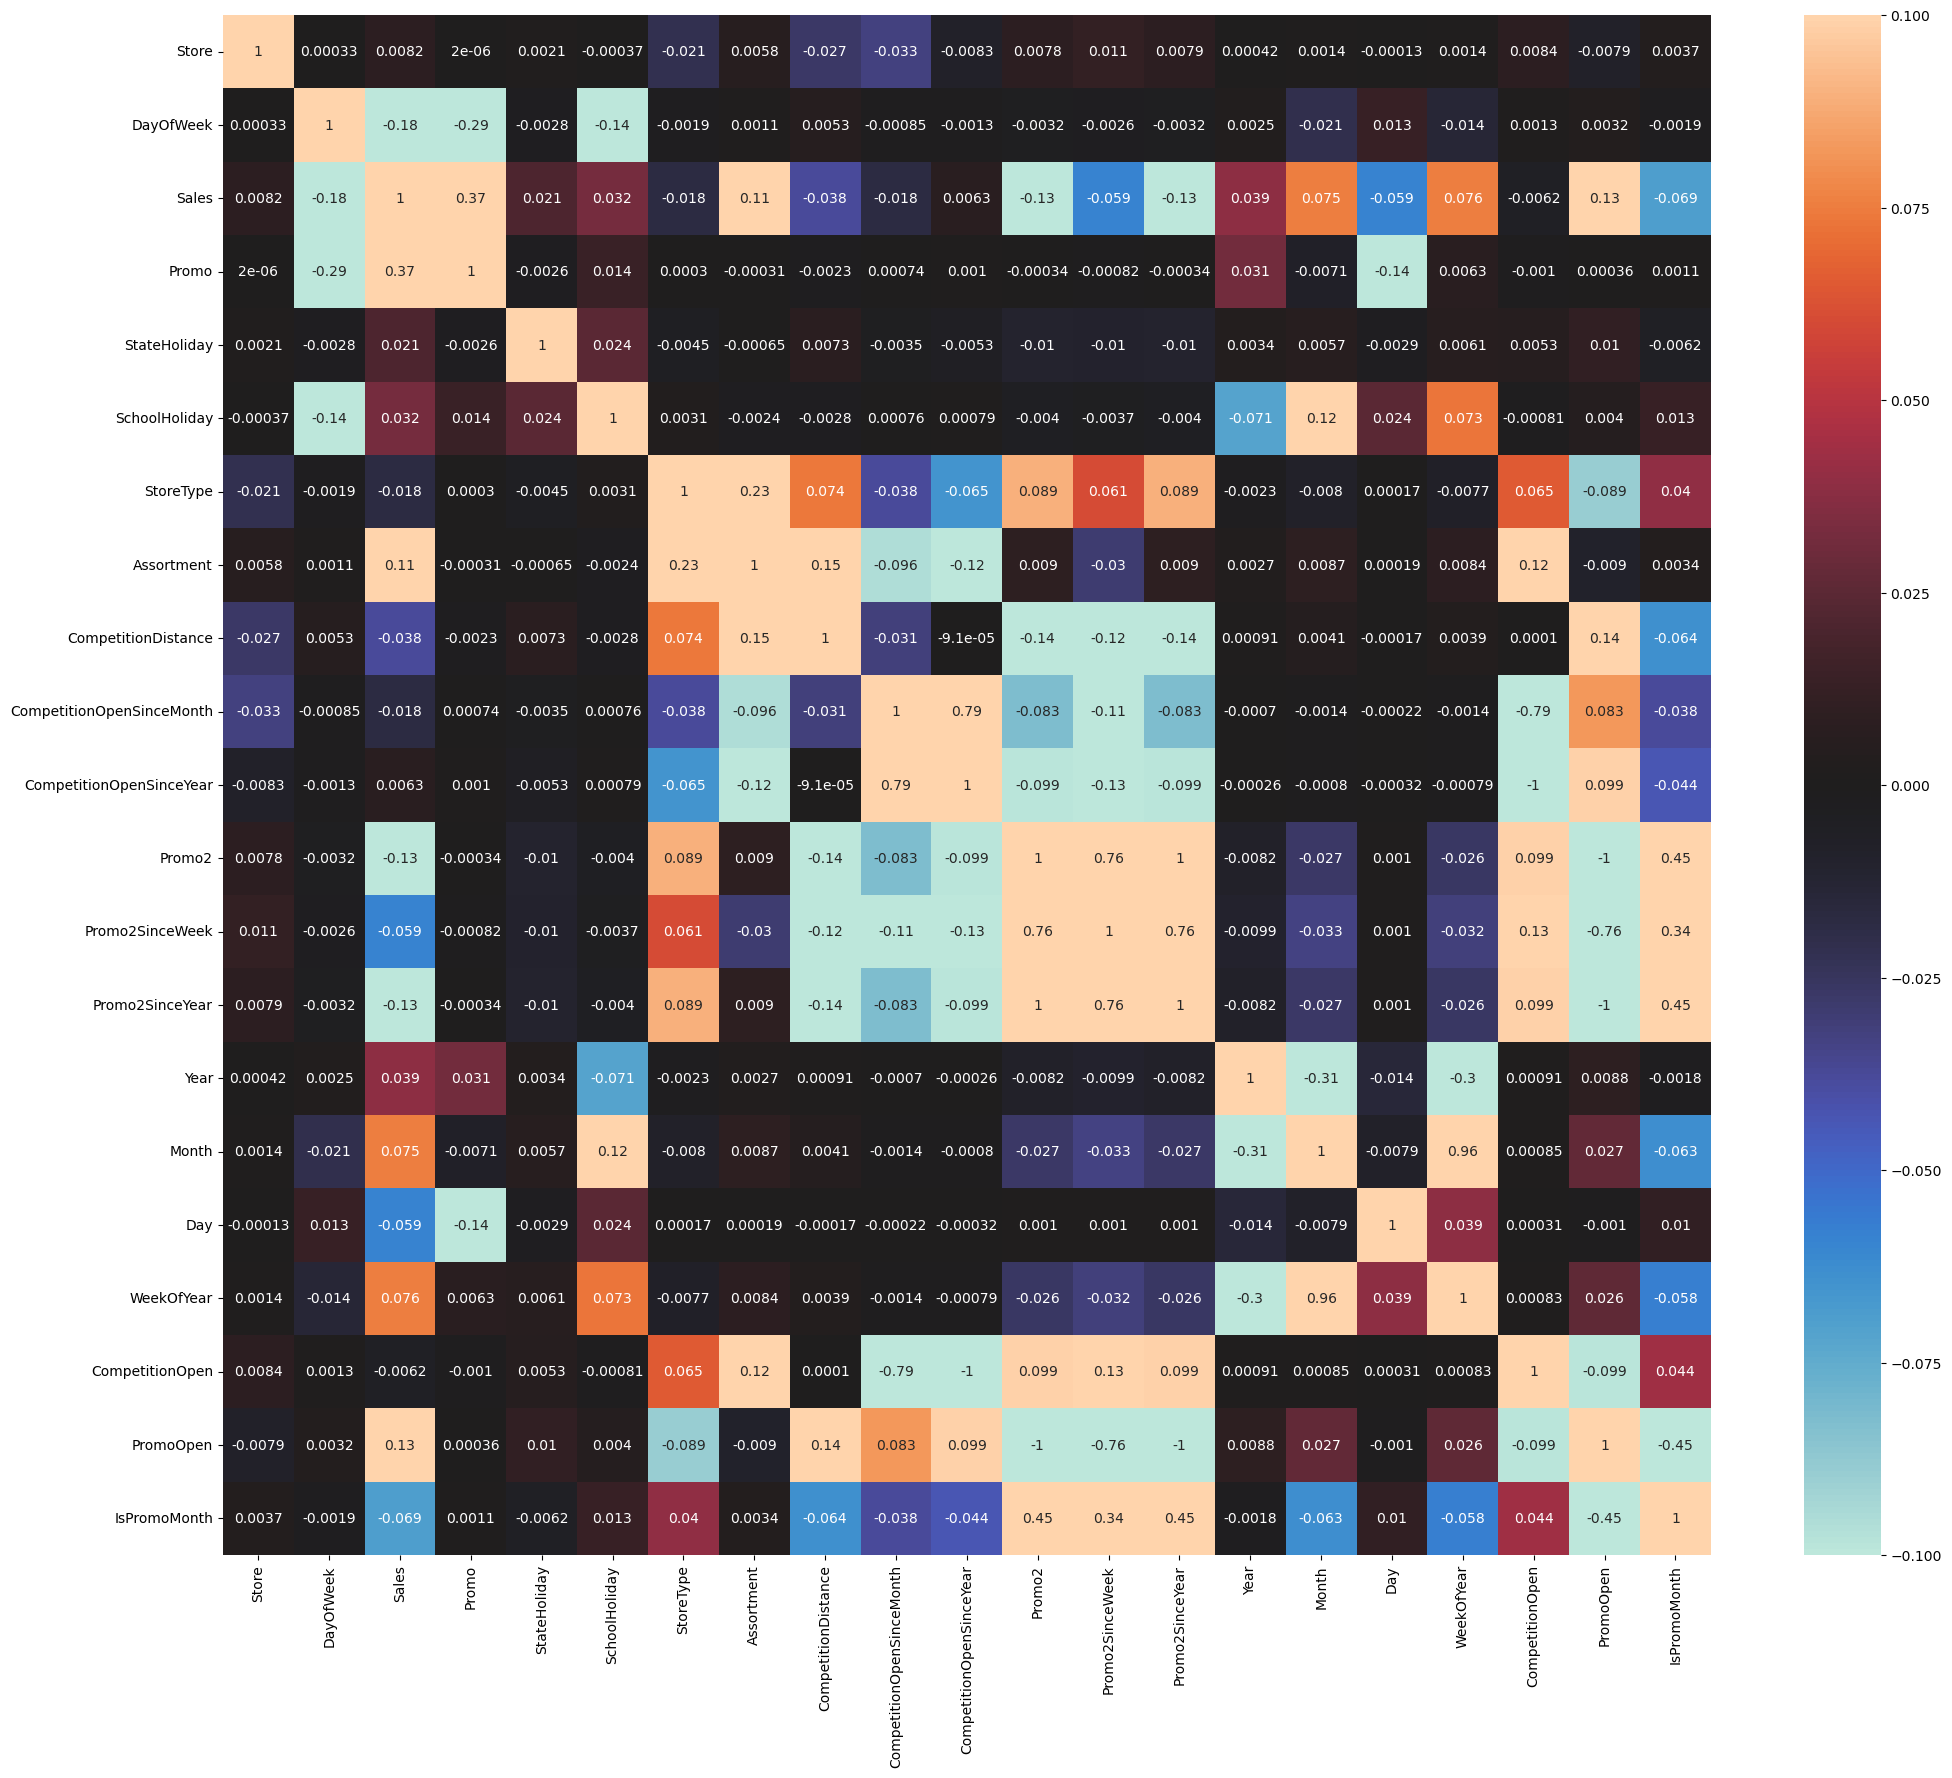

In [20]:
# the heat map of feature-feature and feature-label correlation 
plt.subplots(figsize=(24,20))
sns.heatmap(ho_train.corr(),annot=True, vmin=-0.1, vmax=0.1,center=0)

In [21]:
ho_xtrain = ho_train.drop(['Sales'],axis=1 )
ho_ytrain = np.log1p(ho_train.Sales)
ho_xtest = ho_test.drop(['Sales'],axis=1 )
ho_ytest = np.log1p(ho_test.Sales)

In [22]:
xtest =test.drop(['Id','Date','Open','PromoInterval','monthStr'],axis = 1)

In [23]:
# define rmspe for xgb(code from https://www.kaggle.com/cast42/xgboost-in-python-with-rmspe-v2/code)
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [24]:
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.03,
          "max_depth": 10,
          "subsample": 0.9,
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": 10
          }
num_boost_round = 6000


dtrain = xgb.DMatrix(ho_xtrain, ho_ytrain)
dvalid = xgb.DMatrix(ho_xtest, ho_ytest)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

#模型训练
print("Train a XGBoost model")
start = time()
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, 
  early_stopping_rounds=100, feval=rmspe_xg, verbose_eval=True)
end = time()
print('Training time is {:2f} s.'.format(end-start))

#采用保留数据集进行检测
print("validating")
ho_xtest.sort_index(inplace=True) 
ho_ytest.sort_index(inplace=True) 
yhat = gbm.predict(xgb.DMatrix(ho_xtest))
error = rmspe(np.expm1(ho_ytest), np.expm1(yhat))

print('RMSPE: {:.6f}'.format(error))

Train a XGBoost model
[19:09:11] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[19:09:11] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.



C:\Users\10021\Anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[0]	train-rmse:8.02086	train-rmspe:0.99981	eval-rmse:8.02693	eval-rmspe:0.99981
[1]	train-rmse:7.78076	train-rmspe:0.99971	eval-rmse:7.78688	eval-rmspe:0.99971
[2]	train-rmse:7.54783	train-rmspe:0.99959	eval-rmse:7.55404	eval-rmspe:0.99959
[3]	train-rmse:7.32197	train-rmspe:0.99944	eval-rmse:7.32810	eval-rmspe:0.99945
[4]	train-rmse:7.10289	train-rmspe:0.99926	eval-rmse:7.10792	eval-rmspe:0.99927
[5]	train-rmse:6.89031	train-rmspe:0.99905	eval-rmse:6.89569	eval-rmspe:0.99906
[6]	train-rmse:6.68410	train-rmspe:0.99880	eval-rmse:6.68992	eval-rmspe:0.99881
[7]	train-rmse:6.48409	train-rmspe:0.99850	eval-rmse:6.49022	eval-rmspe:0.99851
[8]	train-rmse:6.29012	train-rmspe:0.99814	eval-rmse:6.29641	eval-rmspe:0.99816
[9]	train-rmse:6.10202	train-rmspe:0.99772	eval-rmse:6.10797	eval-rmspe:0.99775
[10]	train-rmse:5.91956	train-rmspe:0.99724	eval-rmse:5.92522	eval-rmspe:0.99726
[11]	train-rmse:5.74251	train-rmspe:0.99667	eval-rmse:5.74842	eval-rmspe:0.99671
[12]	train-rmse:5.57090	train-rmspe:0.

[102]	train-rmse:0.43712	train-rmspe:0.35159	eval-rmse:0.43077	eval-rmspe:0.33229
[103]	train-rmse:0.42810	train-rmspe:0.34679	eval-rmse:0.42162	eval-rmspe:0.32684
[104]	train-rmse:0.41914	train-rmspe:0.34203	eval-rmse:0.41278	eval-rmspe:0.32154
[105]	train-rmse:0.41085	train-rmspe:0.33762	eval-rmse:0.40438	eval-rmspe:0.31656
[106]	train-rmse:0.40287	train-rmspe:0.33337	eval-rmse:0.39657	eval-rmspe:0.31194
[107]	train-rmse:0.39497	train-rmspe:0.32925	eval-rmse:0.38873	eval-rmspe:0.30730
[108]	train-rmse:0.38713	train-rmspe:0.32509	eval-rmse:0.38102	eval-rmspe:0.30275
[109]	train-rmse:0.37973	train-rmspe:0.32126	eval-rmse:0.37382	eval-rmspe:0.29853
[110]	train-rmse:0.37280	train-rmspe:0.31763	eval-rmse:0.36710	eval-rmspe:0.29457
[111]	train-rmse:0.36603	train-rmspe:0.31404	eval-rmse:0.36059	eval-rmspe:0.29082
[112]	train-rmse:0.35958	train-rmspe:0.31076	eval-rmse:0.35430	eval-rmspe:0.28719
[113]	train-rmse:0.35355	train-rmspe:0.30769	eval-rmse:0.34862	eval-rmspe:0.28399
[114]	train-rmse

[202]	train-rmse:0.19690	train-rmspe:0.24620	eval-rmse:0.20843	eval-rmspe:0.22262
[203]	train-rmse:0.19659	train-rmspe:0.24601	eval-rmse:0.20829	eval-rmspe:0.22269
[204]	train-rmse:0.19643	train-rmspe:0.24608	eval-rmse:0.20818	eval-rmspe:0.22274
[205]	train-rmse:0.19588	train-rmspe:0.24577	eval-rmse:0.20772	eval-rmspe:0.22240
[206]	train-rmse:0.19566	train-rmspe:0.24412	eval-rmse:0.20757	eval-rmspe:0.22238
[207]	train-rmse:0.19518	train-rmspe:0.24380	eval-rmse:0.20705	eval-rmspe:0.22199
[208]	train-rmse:0.19411	train-rmspe:0.24308	eval-rmse:0.20605	eval-rmspe:0.22106
[209]	train-rmse:0.19343	train-rmspe:0.24262	eval-rmse:0.20546	eval-rmspe:0.22056
[210]	train-rmse:0.19278	train-rmspe:0.24207	eval-rmse:0.20492	eval-rmspe:0.22004
[211]	train-rmse:0.19236	train-rmspe:0.24184	eval-rmse:0.20456	eval-rmspe:0.21982
[212]	train-rmse:0.19227	train-rmspe:0.24189	eval-rmse:0.20451	eval-rmspe:0.21989
[213]	train-rmse:0.19199	train-rmspe:0.24174	eval-rmse:0.20430	eval-rmspe:0.21975
[214]	train-rmse

[302]	train-rmse:0.15837	train-rmspe:0.20071	eval-rmse:0.17527	eval-rmspe:0.19145
[303]	train-rmse:0.15771	train-rmspe:0.19995	eval-rmse:0.17463	eval-rmspe:0.19071
[304]	train-rmse:0.15729	train-rmspe:0.19954	eval-rmse:0.17425	eval-rmspe:0.19023
[305]	train-rmse:0.15718	train-rmspe:0.19897	eval-rmse:0.17421	eval-rmspe:0.19021
[306]	train-rmse:0.15680	train-rmspe:0.19819	eval-rmse:0.17388	eval-rmspe:0.18981
[307]	train-rmse:0.15675	train-rmspe:0.19703	eval-rmse:0.17384	eval-rmspe:0.18978
[308]	train-rmse:0.15614	train-rmspe:0.19664	eval-rmse:0.17336	eval-rmspe:0.18927
[309]	train-rmse:0.15572	train-rmspe:0.19629	eval-rmse:0.17297	eval-rmspe:0.18882
[310]	train-rmse:0.15511	train-rmspe:0.19577	eval-rmse:0.17249	eval-rmspe:0.18831
[311]	train-rmse:0.15485	train-rmspe:0.19549	eval-rmse:0.17229	eval-rmspe:0.18810
[312]	train-rmse:0.15474	train-rmspe:0.19539	eval-rmse:0.17216	eval-rmspe:0.18791
[313]	train-rmse:0.15449	train-rmspe:0.19512	eval-rmse:0.17195	eval-rmspe:0.18770
[314]	train-rmse

[402]	train-rmse:0.13290	train-rmspe:0.16991	eval-rmse:0.15414	eval-rmspe:0.16769
[403]	train-rmse:0.13280	train-rmspe:0.16906	eval-rmse:0.15407	eval-rmspe:0.16760
[404]	train-rmse:0.13273	train-rmspe:0.16895	eval-rmse:0.15415	eval-rmspe:0.16776
[405]	train-rmse:0.13263	train-rmspe:0.16886	eval-rmse:0.15406	eval-rmspe:0.16767
[406]	train-rmse:0.13246	train-rmspe:0.16871	eval-rmse:0.15392	eval-rmspe:0.16750
[407]	train-rmse:0.13239	train-rmspe:0.16863	eval-rmse:0.15394	eval-rmspe:0.16757
[408]	train-rmse:0.13208	train-rmspe:0.16830	eval-rmse:0.15369	eval-rmspe:0.16726
[409]	train-rmse:0.13195	train-rmspe:0.16818	eval-rmse:0.15358	eval-rmspe:0.16714
[410]	train-rmse:0.13186	train-rmspe:0.16811	eval-rmse:0.15350	eval-rmspe:0.16706
[411]	train-rmse:0.13151	train-rmspe:0.16780	eval-rmse:0.15319	eval-rmspe:0.16673
[412]	train-rmse:0.13144	train-rmspe:0.16706	eval-rmse:0.15314	eval-rmspe:0.16667
[413]	train-rmse:0.13130	train-rmspe:0.16693	eval-rmse:0.15303	eval-rmspe:0.16656
[414]	train-rmse

[502]	train-rmse:0.11806	train-rmspe:0.15259	eval-rmse:0.14251	eval-rmspe:0.15481
[503]	train-rmse:0.11788	train-rmspe:0.15238	eval-rmse:0.14237	eval-rmspe:0.15466
[504]	train-rmse:0.11770	train-rmspe:0.15220	eval-rmse:0.14223	eval-rmspe:0.15451
[505]	train-rmse:0.11758	train-rmspe:0.15211	eval-rmse:0.14213	eval-rmspe:0.15441
[506]	train-rmse:0.11738	train-rmspe:0.15193	eval-rmse:0.14197	eval-rmspe:0.15422
[507]	train-rmse:0.11734	train-rmspe:0.15186	eval-rmse:0.14195	eval-rmspe:0.15422
[508]	train-rmse:0.11724	train-rmspe:0.15097	eval-rmse:0.14189	eval-rmspe:0.15415
[509]	train-rmse:0.11716	train-rmspe:0.15091	eval-rmse:0.14187	eval-rmspe:0.15411
[510]	train-rmse:0.11703	train-rmspe:0.15080	eval-rmse:0.14176	eval-rmspe:0.15398
[511]	train-rmse:0.11688	train-rmspe:0.15058	eval-rmse:0.14163	eval-rmspe:0.15384
[512]	train-rmse:0.11682	train-rmspe:0.15046	eval-rmse:0.14160	eval-rmspe:0.15381
[513]	train-rmse:0.11673	train-rmspe:0.15038	eval-rmse:0.14152	eval-rmspe:0.15371
[514]	train-rmse

[602]	train-rmse:0.10904	train-rmspe:0.13539	eval-rmse:0.13532	eval-rmspe:0.14672
[603]	train-rmse:0.10897	train-rmspe:0.13532	eval-rmse:0.13527	eval-rmspe:0.14666
[604]	train-rmse:0.10890	train-rmspe:0.13517	eval-rmse:0.13522	eval-rmspe:0.14659
[605]	train-rmse:0.10879	train-rmspe:0.13510	eval-rmse:0.13514	eval-rmspe:0.14650
[606]	train-rmse:0.10876	train-rmspe:0.13502	eval-rmse:0.13504	eval-rmspe:0.14637
[607]	train-rmse:0.10867	train-rmspe:0.13456	eval-rmse:0.13492	eval-rmspe:0.14628
[608]	train-rmse:0.10861	train-rmspe:0.13451	eval-rmse:0.13487	eval-rmspe:0.14621
[609]	train-rmse:0.10858	train-rmspe:0.13448	eval-rmse:0.13484	eval-rmspe:0.14618
[610]	train-rmse:0.10847	train-rmspe:0.13441	eval-rmse:0.13475	eval-rmspe:0.14609
[611]	train-rmse:0.10838	train-rmspe:0.13431	eval-rmse:0.13469	eval-rmspe:0.14602
[612]	train-rmse:0.10835	train-rmspe:0.13429	eval-rmse:0.13467	eval-rmspe:0.14599
[613]	train-rmse:0.10829	train-rmspe:0.13424	eval-rmse:0.13463	eval-rmspe:0.14595
[614]	train-rmse

[702]	train-rmse:0.10233	train-rmspe:0.12466	eval-rmse:0.13012	eval-rmspe:0.14076
[703]	train-rmse:0.10228	train-rmspe:0.12461	eval-rmse:0.13009	eval-rmspe:0.14072
[704]	train-rmse:0.10225	train-rmspe:0.12458	eval-rmse:0.13008	eval-rmspe:0.14071
[705]	train-rmse:0.10218	train-rmspe:0.12451	eval-rmse:0.13003	eval-rmspe:0.14066
[706]	train-rmse:0.10212	train-rmspe:0.12446	eval-rmse:0.12999	eval-rmspe:0.14062
[707]	train-rmse:0.10205	train-rmspe:0.12440	eval-rmse:0.12995	eval-rmspe:0.14058
[708]	train-rmse:0.10199	train-rmspe:0.12434	eval-rmse:0.12991	eval-rmspe:0.14053
[709]	train-rmse:0.10195	train-rmspe:0.12429	eval-rmse:0.12988	eval-rmspe:0.14050
[710]	train-rmse:0.10185	train-rmspe:0.12419	eval-rmse:0.12981	eval-rmspe:0.14041
[711]	train-rmse:0.10182	train-rmspe:0.12416	eval-rmse:0.12979	eval-rmspe:0.14038
[712]	train-rmse:0.10179	train-rmspe:0.12387	eval-rmse:0.12978	eval-rmspe:0.14037
[713]	train-rmse:0.10176	train-rmspe:0.12383	eval-rmse:0.12976	eval-rmspe:0.14034
[714]	train-rmse

[802]	train-rmse:0.09760	train-rmspe:0.11789	eval-rmse:0.12702	eval-rmspe:0.13738
[803]	train-rmse:0.09758	train-rmspe:0.11787	eval-rmse:0.12701	eval-rmspe:0.13738
[804]	train-rmse:0.09757	train-rmspe:0.11786	eval-rmse:0.12701	eval-rmspe:0.13738
[805]	train-rmse:0.09755	train-rmspe:0.11783	eval-rmse:0.12700	eval-rmspe:0.13737
[806]	train-rmse:0.09751	train-rmspe:0.11780	eval-rmse:0.12697	eval-rmspe:0.13734
[807]	train-rmse:0.09747	train-rmspe:0.11776	eval-rmse:0.12694	eval-rmspe:0.13731
[808]	train-rmse:0.09744	train-rmspe:0.11766	eval-rmse:0.12693	eval-rmspe:0.13730
[809]	train-rmse:0.09738	train-rmspe:0.11761	eval-rmse:0.12688	eval-rmspe:0.13725
[810]	train-rmse:0.09732	train-rmspe:0.11755	eval-rmse:0.12682	eval-rmspe:0.13719
[811]	train-rmse:0.09728	train-rmspe:0.11749	eval-rmse:0.12681	eval-rmspe:0.13718
[812]	train-rmse:0.09724	train-rmspe:0.11745	eval-rmse:0.12680	eval-rmspe:0.13716
[813]	train-rmse:0.09722	train-rmspe:0.11726	eval-rmse:0.12679	eval-rmspe:0.13715
[814]	train-rmse

[902]	train-rmse:0.09400	train-rmspe:0.11171	eval-rmse:0.12496	eval-rmspe:0.13514
[903]	train-rmse:0.09398	train-rmspe:0.11169	eval-rmse:0.12495	eval-rmspe:0.13513
[904]	train-rmse:0.09396	train-rmspe:0.11167	eval-rmse:0.12493	eval-rmspe:0.13512
[905]	train-rmse:0.09392	train-rmspe:0.11163	eval-rmse:0.12490	eval-rmspe:0.13508
[906]	train-rmse:0.09389	train-rmspe:0.11160	eval-rmse:0.12489	eval-rmspe:0.13508
[907]	train-rmse:0.09387	train-rmspe:0.11158	eval-rmse:0.12489	eval-rmspe:0.13507
[908]	train-rmse:0.09384	train-rmspe:0.11155	eval-rmse:0.12487	eval-rmspe:0.13505
[909]	train-rmse:0.09382	train-rmspe:0.11153	eval-rmse:0.12487	eval-rmspe:0.13505
[910]	train-rmse:0.09374	train-rmspe:0.11145	eval-rmse:0.12482	eval-rmspe:0.13500
[911]	train-rmse:0.09371	train-rmspe:0.11142	eval-rmse:0.12480	eval-rmspe:0.13498
[912]	train-rmse:0.09369	train-rmspe:0.11140	eval-rmse:0.12480	eval-rmspe:0.13498
[913]	train-rmse:0.09362	train-rmspe:0.11133	eval-rmse:0.12476	eval-rmspe:0.13493
[914]	train-rmse

[1002]	train-rmse:0.09097	train-rmspe:0.10751	eval-rmse:0.12340	eval-rmspe:0.13348
[1003]	train-rmse:0.09096	train-rmspe:0.10748	eval-rmse:0.12340	eval-rmspe:0.13348
[1004]	train-rmse:0.09093	train-rmspe:0.10746	eval-rmse:0.12337	eval-rmspe:0.13345
[1005]	train-rmse:0.09089	train-rmspe:0.10741	eval-rmse:0.12340	eval-rmspe:0.13348
[1006]	train-rmse:0.09086	train-rmspe:0.10738	eval-rmse:0.12338	eval-rmspe:0.13346
[1007]	train-rmse:0.09083	train-rmspe:0.10738	eval-rmse:0.12336	eval-rmspe:0.13345
[1008]	train-rmse:0.09080	train-rmspe:0.10735	eval-rmse:0.12334	eval-rmspe:0.13342
[1009]	train-rmse:0.09078	train-rmspe:0.10734	eval-rmse:0.12334	eval-rmspe:0.13343
[1010]	train-rmse:0.09075	train-rmspe:0.10730	eval-rmse:0.12332	eval-rmspe:0.13340
[1011]	train-rmse:0.09072	train-rmspe:0.10728	eval-rmse:0.12331	eval-rmspe:0.13339
[1012]	train-rmse:0.09069	train-rmspe:0.10725	eval-rmse:0.12329	eval-rmspe:0.13337
[1013]	train-rmse:0.09066	train-rmspe:0.10723	eval-rmse:0.12328	eval-rmspe:0.13337
[101

[1101]	train-rmse:0.08841	train-rmspe:0.10447	eval-rmse:0.12242	eval-rmspe:0.13245
[1102]	train-rmse:0.08839	train-rmspe:0.10441	eval-rmse:0.12242	eval-rmspe:0.13245
[1103]	train-rmse:0.08837	train-rmspe:0.10440	eval-rmse:0.12242	eval-rmspe:0.13245
[1104]	train-rmse:0.08836	train-rmspe:0.10438	eval-rmse:0.12244	eval-rmspe:0.13250
[1105]	train-rmse:0.08834	train-rmspe:0.10436	eval-rmse:0.12244	eval-rmspe:0.13249
[1106]	train-rmse:0.08832	train-rmspe:0.10434	eval-rmse:0.12243	eval-rmspe:0.13248
[1107]	train-rmse:0.08828	train-rmspe:0.10426	eval-rmse:0.12242	eval-rmspe:0.13247
[1108]	train-rmse:0.08824	train-rmspe:0.10422	eval-rmse:0.12241	eval-rmspe:0.13246
[1109]	train-rmse:0.08821	train-rmspe:0.10420	eval-rmse:0.12240	eval-rmspe:0.13246
[1110]	train-rmse:0.08819	train-rmspe:0.10418	eval-rmse:0.12234	eval-rmspe:0.13235
[1111]	train-rmse:0.08816	train-rmspe:0.10415	eval-rmse:0.12232	eval-rmspe:0.13234
[1112]	train-rmse:0.08815	train-rmspe:0.10414	eval-rmse:0.12231	eval-rmspe:0.13233
[111

[1200]	train-rmse:0.08633	train-rmspe:0.10114	eval-rmse:0.12167	eval-rmspe:0.13160
[1201]	train-rmse:0.08631	train-rmspe:0.10112	eval-rmse:0.12165	eval-rmspe:0.13159
[1202]	train-rmse:0.08630	train-rmspe:0.10111	eval-rmse:0.12164	eval-rmspe:0.13158
[1203]	train-rmse:0.08629	train-rmspe:0.10110	eval-rmse:0.12164	eval-rmspe:0.13157
[1204]	train-rmse:0.08628	train-rmspe:0.10108	eval-rmse:0.12163	eval-rmspe:0.13157
[1205]	train-rmse:0.08625	train-rmspe:0.10097	eval-rmse:0.12162	eval-rmspe:0.13156
[1206]	train-rmse:0.08625	train-rmspe:0.10097	eval-rmse:0.12162	eval-rmspe:0.13155
[1207]	train-rmse:0.08623	train-rmspe:0.10095	eval-rmse:0.12161	eval-rmspe:0.13154
[1208]	train-rmse:0.08620	train-rmspe:0.10091	eval-rmse:0.12159	eval-rmspe:0.13152
[1209]	train-rmse:0.08619	train-rmspe:0.10091	eval-rmse:0.12159	eval-rmspe:0.13152
[1210]	train-rmse:0.08617	train-rmspe:0.10090	eval-rmse:0.12158	eval-rmspe:0.13151
[1211]	train-rmse:0.08616	train-rmspe:0.10088	eval-rmse:0.12158	eval-rmspe:0.13151
[121

[1299]	train-rmse:0.08447	train-rmspe:0.09760	eval-rmse:0.12092	eval-rmspe:0.13084
[1300]	train-rmse:0.08447	train-rmspe:0.09760	eval-rmse:0.12091	eval-rmspe:0.13082
[1301]	train-rmse:0.08445	train-rmspe:0.09758	eval-rmse:0.12090	eval-rmspe:0.13081
[1302]	train-rmse:0.08444	train-rmspe:0.09757	eval-rmse:0.12090	eval-rmspe:0.13081
[1303]	train-rmse:0.08442	train-rmspe:0.09754	eval-rmse:0.12085	eval-rmspe:0.13074
[1304]	train-rmse:0.08441	train-rmspe:0.09753	eval-rmse:0.12084	eval-rmspe:0.13074
[1305]	train-rmse:0.08438	train-rmspe:0.09742	eval-rmse:0.12083	eval-rmspe:0.13073
[1306]	train-rmse:0.08435	train-rmspe:0.09738	eval-rmse:0.12082	eval-rmspe:0.13072
[1307]	train-rmse:0.08433	train-rmspe:0.09736	eval-rmse:0.12082	eval-rmspe:0.13071
[1308]	train-rmse:0.08432	train-rmspe:0.09734	eval-rmse:0.12081	eval-rmspe:0.13070
[1309]	train-rmse:0.08431	train-rmspe:0.09733	eval-rmse:0.12081	eval-rmspe:0.13069
[1310]	train-rmse:0.08430	train-rmspe:0.09732	eval-rmse:0.12079	eval-rmspe:0.13067
[131

[1398]	train-rmse:0.08275	train-rmspe:0.09455	eval-rmse:0.12028	eval-rmspe:0.13018
[1399]	train-rmse:0.08275	train-rmspe:0.09454	eval-rmse:0.12028	eval-rmspe:0.13017
[1400]	train-rmse:0.08274	train-rmspe:0.09453	eval-rmse:0.12028	eval-rmspe:0.13016
[1401]	train-rmse:0.08271	train-rmspe:0.09450	eval-rmse:0.12027	eval-rmspe:0.13016
[1402]	train-rmse:0.08271	train-rmspe:0.09449	eval-rmse:0.12027	eval-rmspe:0.13016
[1403]	train-rmse:0.08269	train-rmspe:0.09446	eval-rmse:0.12027	eval-rmspe:0.13015
[1404]	train-rmse:0.08267	train-rmspe:0.09444	eval-rmse:0.12027	eval-rmspe:0.13016
[1405]	train-rmse:0.08264	train-rmspe:0.09441	eval-rmse:0.12025	eval-rmspe:0.13014
[1406]	train-rmse:0.08263	train-rmspe:0.09440	eval-rmse:0.12025	eval-rmspe:0.13014
[1407]	train-rmse:0.08261	train-rmspe:0.09437	eval-rmse:0.12024	eval-rmspe:0.13013
[1408]	train-rmse:0.08258	train-rmspe:0.09435	eval-rmse:0.12023	eval-rmspe:0.13012
[1409]	train-rmse:0.08257	train-rmspe:0.09433	eval-rmse:0.12023	eval-rmspe:0.13012
[141

[1497]	train-rmse:0.08119	train-rmspe:0.09223	eval-rmse:0.11992	eval-rmspe:0.12979
[1498]	train-rmse:0.08118	train-rmspe:0.09222	eval-rmse:0.11992	eval-rmspe:0.12979
[1499]	train-rmse:0.08117	train-rmspe:0.09221	eval-rmse:0.11991	eval-rmspe:0.12978
[1500]	train-rmse:0.08115	train-rmspe:0.09219	eval-rmse:0.11991	eval-rmspe:0.12977
[1501]	train-rmse:0.08113	train-rmspe:0.09214	eval-rmse:0.11990	eval-rmspe:0.12977
[1502]	train-rmse:0.08113	train-rmspe:0.09213	eval-rmse:0.11990	eval-rmspe:0.12977
[1503]	train-rmse:0.08110	train-rmspe:0.09207	eval-rmse:0.11990	eval-rmspe:0.12977
[1504]	train-rmse:0.08109	train-rmspe:0.09206	eval-rmse:0.11990	eval-rmspe:0.12977
[1505]	train-rmse:0.08107	train-rmspe:0.09205	eval-rmse:0.11990	eval-rmspe:0.12976
[1506]	train-rmse:0.08106	train-rmspe:0.09204	eval-rmse:0.11989	eval-rmspe:0.12976
[1507]	train-rmse:0.08105	train-rmspe:0.09202	eval-rmse:0.11989	eval-rmspe:0.12975
[1508]	train-rmse:0.08103	train-rmspe:0.09201	eval-rmse:0.11988	eval-rmspe:0.12975
[150

[1596]	train-rmse:0.07981	train-rmspe:0.09000	eval-rmse:0.11954	eval-rmspe:0.12935
[1597]	train-rmse:0.07979	train-rmspe:0.08998	eval-rmse:0.11954	eval-rmspe:0.12935
[1598]	train-rmse:0.07978	train-rmspe:0.08997	eval-rmse:0.11953	eval-rmspe:0.12934
[1599]	train-rmse:0.07977	train-rmspe:0.08995	eval-rmse:0.11952	eval-rmspe:0.12933
[1600]	train-rmse:0.07976	train-rmspe:0.08995	eval-rmse:0.11952	eval-rmspe:0.12933
[1601]	train-rmse:0.07974	train-rmspe:0.08992	eval-rmse:0.11951	eval-rmspe:0.12932
[1602]	train-rmse:0.07973	train-rmspe:0.08991	eval-rmse:0.11952	eval-rmspe:0.12933
[1603]	train-rmse:0.07971	train-rmspe:0.08987	eval-rmse:0.11954	eval-rmspe:0.12935
[1604]	train-rmse:0.07969	train-rmspe:0.08986	eval-rmse:0.11953	eval-rmspe:0.12935
[1605]	train-rmse:0.07969	train-rmspe:0.08985	eval-rmse:0.11954	eval-rmspe:0.12935
[1606]	train-rmse:0.07968	train-rmspe:0.08984	eval-rmse:0.11954	eval-rmspe:0.12935
[1607]	train-rmse:0.07965	train-rmspe:0.08981	eval-rmse:0.11952	eval-rmspe:0.12934
[160

[1695]	train-rmse:0.07854	train-rmspe:0.08786	eval-rmse:0.11924	eval-rmspe:0.12904
[1696]	train-rmse:0.07854	train-rmspe:0.08785	eval-rmse:0.11924	eval-rmspe:0.12904
[1697]	train-rmse:0.07852	train-rmspe:0.08782	eval-rmse:0.11924	eval-rmspe:0.12904
[1698]	train-rmse:0.07851	train-rmspe:0.08781	eval-rmse:0.11925	eval-rmspe:0.12903
[1699]	train-rmse:0.07850	train-rmspe:0.08780	eval-rmse:0.11925	eval-rmspe:0.12903
[1700]	train-rmse:0.07849	train-rmspe:0.08779	eval-rmse:0.11924	eval-rmspe:0.12903
[1701]	train-rmse:0.07848	train-rmspe:0.08775	eval-rmse:0.11925	eval-rmspe:0.12903
[1702]	train-rmse:0.07847	train-rmspe:0.08774	eval-rmse:0.11925	eval-rmspe:0.12903
[1703]	train-rmse:0.07846	train-rmspe:0.08773	eval-rmse:0.11926	eval-rmspe:0.12904
[1704]	train-rmse:0.07845	train-rmspe:0.08772	eval-rmse:0.11925	eval-rmspe:0.12904
[1705]	train-rmse:0.07843	train-rmspe:0.08769	eval-rmse:0.11926	eval-rmspe:0.12904
[1706]	train-rmse:0.07842	train-rmspe:0.08767	eval-rmse:0.11926	eval-rmspe:0.12905
[170

[1794]	train-rmse:0.07733	train-rmspe:0.08599	eval-rmse:0.11898	eval-rmspe:0.12873
[1795]	train-rmse:0.07732	train-rmspe:0.08598	eval-rmse:0.11898	eval-rmspe:0.12873
[1796]	train-rmse:0.07729	train-rmspe:0.08594	eval-rmse:0.11897	eval-rmspe:0.12872
[1797]	train-rmse:0.07728	train-rmspe:0.08593	eval-rmse:0.11897	eval-rmspe:0.12871
[1798]	train-rmse:0.07727	train-rmspe:0.08592	eval-rmse:0.11897	eval-rmspe:0.12872
[1799]	train-rmse:0.07725	train-rmspe:0.08590	eval-rmse:0.11898	eval-rmspe:0.12873
[1800]	train-rmse:0.07724	train-rmspe:0.08588	eval-rmse:0.11897	eval-rmspe:0.12872
[1801]	train-rmse:0.07723	train-rmspe:0.08587	eval-rmse:0.11897	eval-rmspe:0.12871
[1802]	train-rmse:0.07722	train-rmspe:0.08586	eval-rmse:0.11897	eval-rmspe:0.12871
[1803]	train-rmse:0.07721	train-rmspe:0.08585	eval-rmse:0.11897	eval-rmspe:0.12870
[1804]	train-rmse:0.07720	train-rmspe:0.08584	eval-rmse:0.11897	eval-rmspe:0.12871
[1805]	train-rmse:0.07719	train-rmspe:0.08584	eval-rmse:0.11896	eval-rmspe:0.12870
[180

[1893]	train-rmse:0.07620	train-rmspe:0.08434	eval-rmse:0.11876	eval-rmspe:0.12852
[1894]	train-rmse:0.07619	train-rmspe:0.08433	eval-rmse:0.11876	eval-rmspe:0.12852
[1895]	train-rmse:0.07618	train-rmspe:0.08432	eval-rmse:0.11876	eval-rmspe:0.12853
[1896]	train-rmse:0.07617	train-rmspe:0.08431	eval-rmse:0.11876	eval-rmspe:0.12852
[1897]	train-rmse:0.07616	train-rmspe:0.08429	eval-rmse:0.11876	eval-rmspe:0.12852
[1898]	train-rmse:0.07614	train-rmspe:0.08427	eval-rmse:0.11876	eval-rmspe:0.12852
[1899]	train-rmse:0.07613	train-rmspe:0.08426	eval-rmse:0.11876	eval-rmspe:0.12852
[1900]	train-rmse:0.07613	train-rmspe:0.08425	eval-rmse:0.11875	eval-rmspe:0.12852
[1901]	train-rmse:0.07612	train-rmspe:0.08422	eval-rmse:0.11875	eval-rmspe:0.12851
[1902]	train-rmse:0.07611	train-rmspe:0.08420	eval-rmse:0.11875	eval-rmspe:0.12851
[1903]	train-rmse:0.07609	train-rmspe:0.08418	eval-rmse:0.11874	eval-rmspe:0.12851
[1904]	train-rmse:0.07608	train-rmspe:0.08417	eval-rmse:0.11874	eval-rmspe:0.12851
[190

[1992]	train-rmse:0.07516	train-rmspe:0.08285	eval-rmse:0.11850	eval-rmspe:0.12825
[1993]	train-rmse:0.07515	train-rmspe:0.08282	eval-rmse:0.11850	eval-rmspe:0.12824
[1994]	train-rmse:0.07514	train-rmspe:0.08280	eval-rmse:0.11850	eval-rmspe:0.12824
[1995]	train-rmse:0.07513	train-rmspe:0.08279	eval-rmse:0.11850	eval-rmspe:0.12824
[1996]	train-rmse:0.07511	train-rmspe:0.08278	eval-rmse:0.11849	eval-rmspe:0.12823
[1997]	train-rmse:0.07511	train-rmspe:0.08277	eval-rmse:0.11849	eval-rmspe:0.12824
[1998]	train-rmse:0.07510	train-rmspe:0.08275	eval-rmse:0.11850	eval-rmspe:0.12824
[1999]	train-rmse:0.07509	train-rmspe:0.08274	eval-rmse:0.11849	eval-rmspe:0.12823
[2000]	train-rmse:0.07507	train-rmspe:0.08271	eval-rmse:0.11849	eval-rmspe:0.12823
[2001]	train-rmse:0.07507	train-rmspe:0.08270	eval-rmse:0.11849	eval-rmspe:0.12823
[2002]	train-rmse:0.07506	train-rmspe:0.08269	eval-rmse:0.11849	eval-rmspe:0.12823
[2003]	train-rmse:0.07505	train-rmspe:0.08268	eval-rmse:0.11849	eval-rmspe:0.12822
[200

[2091]	train-rmse:0.07415	train-rmspe:0.08146	eval-rmse:0.11831	eval-rmspe:0.12801
[2092]	train-rmse:0.07415	train-rmspe:0.08146	eval-rmse:0.11830	eval-rmspe:0.12800
[2093]	train-rmse:0.07413	train-rmspe:0.08143	eval-rmse:0.11830	eval-rmspe:0.12799
[2094]	train-rmse:0.07412	train-rmspe:0.08141	eval-rmse:0.11830	eval-rmspe:0.12799
[2095]	train-rmse:0.07411	train-rmspe:0.08139	eval-rmse:0.11830	eval-rmspe:0.12799
[2096]	train-rmse:0.07409	train-rmspe:0.08137	eval-rmse:0.11830	eval-rmspe:0.12799
[2097]	train-rmse:0.07408	train-rmspe:0.08136	eval-rmse:0.11829	eval-rmspe:0.12799
[2098]	train-rmse:0.07407	train-rmspe:0.08135	eval-rmse:0.11829	eval-rmspe:0.12798
[2099]	train-rmse:0.07406	train-rmspe:0.08133	eval-rmse:0.11829	eval-rmspe:0.12798
[2100]	train-rmse:0.07405	train-rmspe:0.08131	eval-rmse:0.11829	eval-rmspe:0.12798
[2101]	train-rmse:0.07404	train-rmspe:0.08129	eval-rmse:0.11829	eval-rmspe:0.12798
[2102]	train-rmse:0.07403	train-rmspe:0.08128	eval-rmse:0.11829	eval-rmspe:0.12798
[210

[2190]	train-rmse:0.07319	train-rmspe:0.07984	eval-rmse:0.11815	eval-rmspe:0.12785
[2191]	train-rmse:0.07319	train-rmspe:0.07984	eval-rmse:0.11815	eval-rmspe:0.12784
[2192]	train-rmse:0.07318	train-rmspe:0.07983	eval-rmse:0.11814	eval-rmspe:0.12784
[2193]	train-rmse:0.07318	train-rmspe:0.07982	eval-rmse:0.11815	eval-rmspe:0.12784
[2194]	train-rmse:0.07317	train-rmspe:0.07981	eval-rmse:0.11814	eval-rmspe:0.12784
[2195]	train-rmse:0.07316	train-rmspe:0.07980	eval-rmse:0.11814	eval-rmspe:0.12784
[2196]	train-rmse:0.07315	train-rmspe:0.07979	eval-rmse:0.11814	eval-rmspe:0.12784
[2197]	train-rmse:0.07314	train-rmspe:0.07971	eval-rmse:0.11814	eval-rmspe:0.12784
[2198]	train-rmse:0.07313	train-rmspe:0.07970	eval-rmse:0.11814	eval-rmspe:0.12784
[2199]	train-rmse:0.07313	train-rmspe:0.07969	eval-rmse:0.11814	eval-rmspe:0.12783
[2200]	train-rmse:0.07312	train-rmspe:0.07968	eval-rmse:0.11814	eval-rmspe:0.12784
[2201]	train-rmse:0.07311	train-rmspe:0.07966	eval-rmse:0.11814	eval-rmspe:0.12784
[220

[2289]	train-rmse:0.07237	train-rmspe:0.07859	eval-rmse:0.11801	eval-rmspe:0.12767
[2290]	train-rmse:0.07235	train-rmspe:0.07858	eval-rmse:0.11801	eval-rmspe:0.12766
[2291]	train-rmse:0.07235	train-rmspe:0.07857	eval-rmse:0.11801	eval-rmspe:0.12766
[2292]	train-rmse:0.07234	train-rmspe:0.07856	eval-rmse:0.11800	eval-rmspe:0.12766
[2293]	train-rmse:0.07233	train-rmspe:0.07850	eval-rmse:0.11800	eval-rmspe:0.12766
[2294]	train-rmse:0.07232	train-rmspe:0.07849	eval-rmse:0.11800	eval-rmspe:0.12767
[2295]	train-rmse:0.07231	train-rmspe:0.07847	eval-rmse:0.11801	eval-rmspe:0.12767
[2296]	train-rmse:0.07231	train-rmspe:0.07847	eval-rmse:0.11801	eval-rmspe:0.12767
[2297]	train-rmse:0.07230	train-rmspe:0.07846	eval-rmse:0.11800	eval-rmspe:0.12767
[2298]	train-rmse:0.07229	train-rmspe:0.07844	eval-rmse:0.11800	eval-rmspe:0.12766
[2299]	train-rmse:0.07228	train-rmspe:0.07844	eval-rmse:0.11800	eval-rmspe:0.12766
[2300]	train-rmse:0.07227	train-rmspe:0.07843	eval-rmse:0.11800	eval-rmspe:0.12766
[230

[2388]	train-rmse:0.07153	train-rmspe:0.07736	eval-rmse:0.11792	eval-rmspe:0.12760
[2389]	train-rmse:0.07153	train-rmspe:0.07735	eval-rmse:0.11792	eval-rmspe:0.12760
[2390]	train-rmse:0.07152	train-rmspe:0.07734	eval-rmse:0.11792	eval-rmspe:0.12760
[2391]	train-rmse:0.07151	train-rmspe:0.07733	eval-rmse:0.11792	eval-rmspe:0.12760
[2392]	train-rmse:0.07149	train-rmspe:0.07731	eval-rmse:0.11790	eval-rmspe:0.12756
[2393]	train-rmse:0.07149	train-rmspe:0.07730	eval-rmse:0.11789	eval-rmspe:0.12756
[2394]	train-rmse:0.07148	train-rmspe:0.07729	eval-rmse:0.11789	eval-rmspe:0.12756
[2395]	train-rmse:0.07147	train-rmspe:0.07727	eval-rmse:0.11789	eval-rmspe:0.12756
[2396]	train-rmse:0.07146	train-rmspe:0.07726	eval-rmse:0.11789	eval-rmspe:0.12756
[2397]	train-rmse:0.07145	train-rmspe:0.07725	eval-rmse:0.11789	eval-rmspe:0.12757
[2398]	train-rmse:0.07145	train-rmspe:0.07724	eval-rmse:0.11789	eval-rmspe:0.12757
[2399]	train-rmse:0.07144	train-rmspe:0.07724	eval-rmse:0.11789	eval-rmspe:0.12756
[240

[2487]	train-rmse:0.07072	train-rmspe:0.07627	eval-rmse:0.11788	eval-rmspe:0.12755
[2488]	train-rmse:0.07072	train-rmspe:0.07626	eval-rmse:0.11788	eval-rmspe:0.12756
[2489]	train-rmse:0.07071	train-rmspe:0.07625	eval-rmse:0.11788	eval-rmspe:0.12756
[2490]	train-rmse:0.07070	train-rmspe:0.07624	eval-rmse:0.11787	eval-rmspe:0.12755
[2491]	train-rmse:0.07069	train-rmspe:0.07623	eval-rmse:0.11787	eval-rmspe:0.12755
[2492]	train-rmse:0.07069	train-rmspe:0.07622	eval-rmse:0.11787	eval-rmspe:0.12755
[2493]	train-rmse:0.07068	train-rmspe:0.07621	eval-rmse:0.11787	eval-rmspe:0.12754
[2494]	train-rmse:0.07067	train-rmspe:0.07619	eval-rmse:0.11786	eval-rmspe:0.12754
[2495]	train-rmse:0.07065	train-rmspe:0.07618	eval-rmse:0.11786	eval-rmspe:0.12754
[2496]	train-rmse:0.07065	train-rmspe:0.07617	eval-rmse:0.11786	eval-rmspe:0.12753
[2497]	train-rmse:0.07064	train-rmspe:0.07615	eval-rmse:0.11786	eval-rmspe:0.12754
[2498]	train-rmse:0.07063	train-rmspe:0.07615	eval-rmse:0.11786	eval-rmspe:0.12753
[249

[2586]	train-rmse:0.06994	train-rmspe:0.07526	eval-rmse:0.11776	eval-rmspe:0.12743
[2587]	train-rmse:0.06993	train-rmspe:0.07525	eval-rmse:0.11776	eval-rmspe:0.12743
[2588]	train-rmse:0.06993	train-rmspe:0.07523	eval-rmse:0.11776	eval-rmspe:0.12743
[2589]	train-rmse:0.06992	train-rmspe:0.07522	eval-rmse:0.11776	eval-rmspe:0.12744
[2590]	train-rmse:0.06991	train-rmspe:0.07520	eval-rmse:0.11775	eval-rmspe:0.12743
[2591]	train-rmse:0.06990	train-rmspe:0.07519	eval-rmse:0.11775	eval-rmspe:0.12743
[2592]	train-rmse:0.06989	train-rmspe:0.07517	eval-rmse:0.11774	eval-rmspe:0.12741
[2593]	train-rmse:0.06988	train-rmspe:0.07516	eval-rmse:0.11774	eval-rmspe:0.12741
[2594]	train-rmse:0.06987	train-rmspe:0.07515	eval-rmse:0.11774	eval-rmspe:0.12740
[2595]	train-rmse:0.06986	train-rmspe:0.07514	eval-rmse:0.11773	eval-rmspe:0.12740
[2596]	train-rmse:0.06985	train-rmspe:0.07513	eval-rmse:0.11773	eval-rmspe:0.12740
[2597]	train-rmse:0.06985	train-rmspe:0.07512	eval-rmse:0.11773	eval-rmspe:0.12740
[259

[2685]	train-rmse:0.06917	train-rmspe:0.07416	eval-rmse:0.11763	eval-rmspe:0.12732
[2686]	train-rmse:0.06916	train-rmspe:0.07415	eval-rmse:0.11763	eval-rmspe:0.12732
[2687]	train-rmse:0.06915	train-rmspe:0.07412	eval-rmse:0.11763	eval-rmspe:0.12731
[2688]	train-rmse:0.06914	train-rmspe:0.07412	eval-rmse:0.11763	eval-rmspe:0.12731
[2689]	train-rmse:0.06913	train-rmspe:0.07410	eval-rmse:0.11763	eval-rmspe:0.12731
[2690]	train-rmse:0.06912	train-rmspe:0.07409	eval-rmse:0.11762	eval-rmspe:0.12731
[2691]	train-rmse:0.06912	train-rmspe:0.07408	eval-rmse:0.11762	eval-rmspe:0.12731
[2692]	train-rmse:0.06911	train-rmspe:0.07407	eval-rmse:0.11762	eval-rmspe:0.12730
[2693]	train-rmse:0.06910	train-rmspe:0.07404	eval-rmse:0.11762	eval-rmspe:0.12730
[2694]	train-rmse:0.06909	train-rmspe:0.07404	eval-rmse:0.11763	eval-rmspe:0.12732
[2695]	train-rmse:0.06908	train-rmspe:0.07402	eval-rmse:0.11763	eval-rmspe:0.12731
[2696]	train-rmse:0.06908	train-rmspe:0.07402	eval-rmse:0.11763	eval-rmspe:0.12731
[269

In [25]:
# analysis by hold-out set
res = pd.DataFrame(data = ho_ytest)
res['Prediction']=yhat
res = pd.merge(ho_xtest,res, left_index= True, right_index=True)
res['Ratio'] = res.Prediction/res.Sales
res['Error'] =abs(res.Ratio-1)
res['Weight'] = res.Sales/res.Prediction
res.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth,Sales,Prediction,Ratio,Error,Weight
0,1,4,1,0,1,3,1,1270.0,9.0,2008.0,...,31,31,82.0,24187.75,0,8.568646,8.623676,1.006422,0.006422,0.993619
1,1,3,1,0,1,3,1,1270.0,9.0,2008.0,...,30,31,82.0,24187.75,0,8.521384,8.550196,1.003381,0.003381,0.996630
2,1,2,1,0,1,3,1,1270.0,9.0,2008.0,...,29,31,82.0,24187.75,0,8.472823,8.477879,1.000597,0.000597,0.999404
3,1,1,1,0,1,3,1,1270.0,9.0,2008.0,...,28,31,82.0,24187.75,0,8.519590,8.453266,0.992215,0.007785,1.007846
4,1,0,1,0,1,3,1,1270.0,9.0,2008.0,...,27,31,82.0,24187.75,0,8.716536,8.568081,0.982969,0.017031,1.017326


Mean Ratio of predition and real sales data is 1.0024974834633829: store all
Mean Ratio of predition and real sales data is 1.0036354741507696: store 400
Mean Ratio of predition and real sales data is 1.0056596850106017: store 6
Mean Ratio of predition and real sales data is 1.0069340793053299: store 623


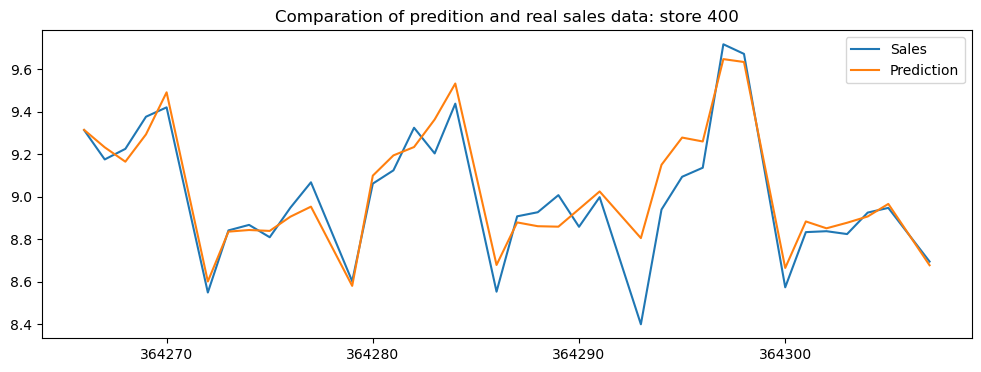

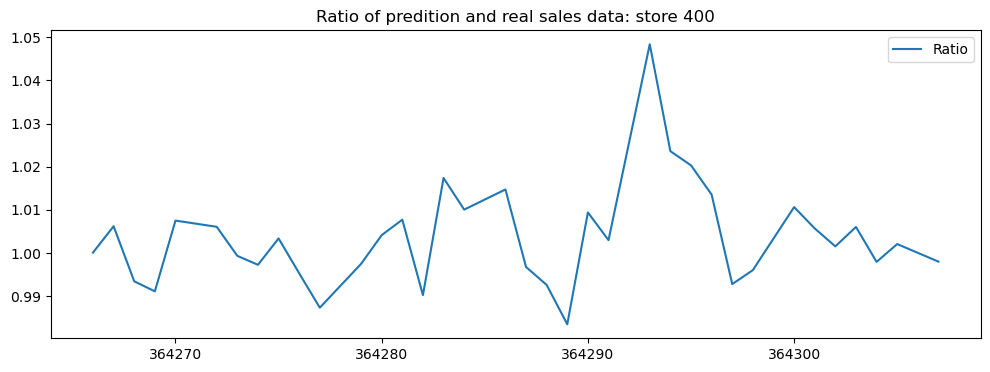

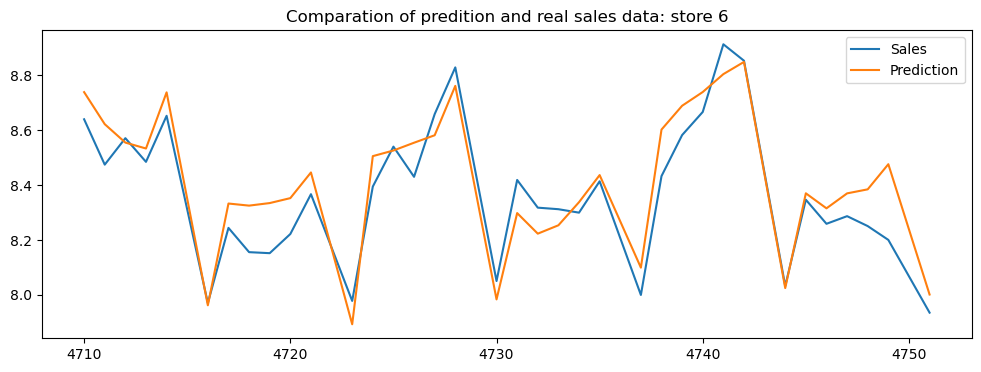

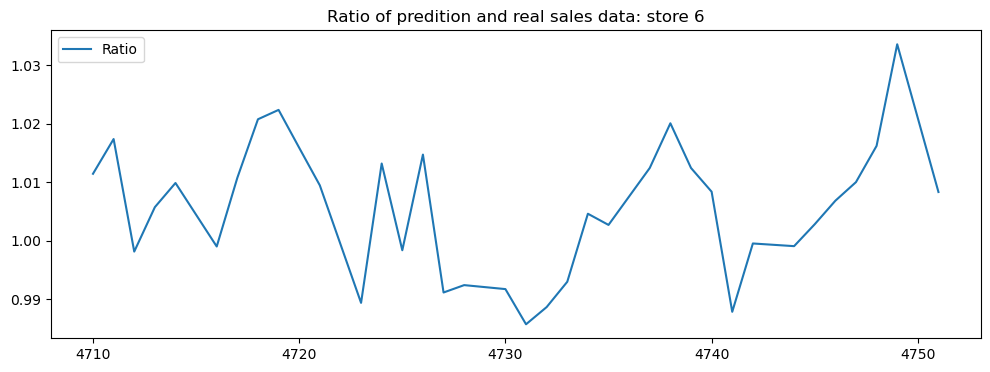

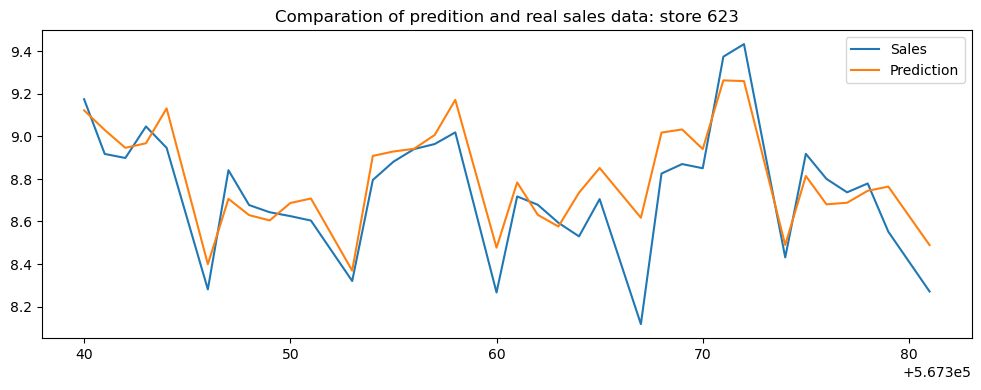

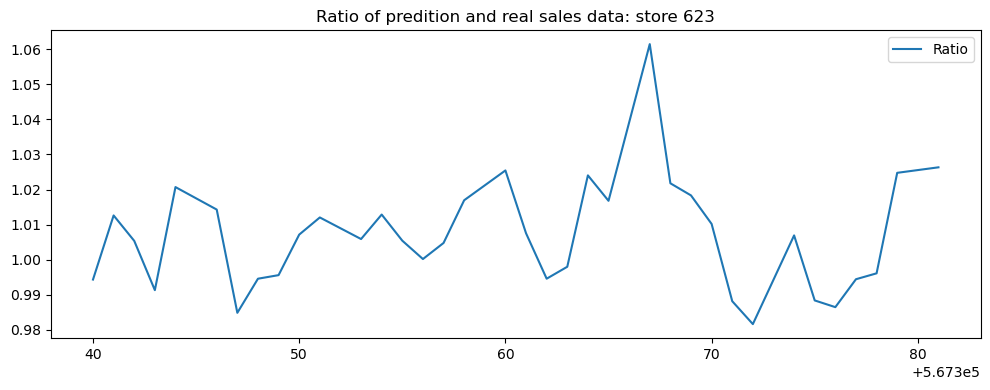

In [26]:
col_1 = ['Sales','Prediction']
col_2 = ['Ratio']
L=np.random.randint( low=1,high = 1115, size = 3 ) 
print('Mean Ratio of predition and real sales data is {}: store all'.format(res.Ratio.mean()))
for i in L:
    
    s1 = pd.DataFrame(res[res['Store']==i],columns = col_1)
    s2 = pd.DataFrame(res[res['Store']==i],columns = col_2)
    s1.plot(title = 'Comparation of predition and real sales data: store {}'.format(i),figsize=(12,4))
    s2.plot(title = 'Ratio of predition and real sales data: store {}'.format(i),figsize=(12,4))
    print('Mean Ratio of predition and real sales data is {}: store {}'.format(s2.Ratio.mean(),i))

In [27]:
# the worst 10 samples
res.sort_values(['Error'],ascending=False,inplace= True)
res[:10]

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth,Sales,Prediction,Ratio,Error,Weight
264207,292,4,0,0,0,1,1,1100.0,6.0,2009.0,...,10,28,73.0,24187.00,0,6.920672,8.541874,1.234255,0.234255,0.810205
711449,782,4,0,0,0,3,3,5390.0,8.0,2003.0,...,26,26,142.0,42.25,0,7.260523,8.593683,1.183618,0.183618,0.844867
827582,909,2,1,0,0,1,3,1680.0,0.0,0.0,...,1,27,24187.0,67.50,0,8.174139,9.525632,1.165338,0.165338,0.858120
797965,876,5,0,0,0,1,1,21790.0,4.0,2005.0,...,4,27,123.0,2.25,0,9.596215,8.254940,0.860229,0.139771,1.162481
827591,909,0,0,0,0,1,3,1680.0,0.0,0.0,...,22,26,24186.0,67.25,0,10.634701,9.148342,0.860235,0.139765,1.162473
264213,292,5,0,0,0,1,1,1100.0,6.0,2009.0,...,4,27,73.0,24186.75,0,7.406711,8.321812,1.123550,0.123550,0.890036
264218,292,0,1,0,0,1,1,1100.0,6.0,2009.0,...,29,27,72.0,24186.75,0,10.280622,9.050508,0.880346,0.119654,1.135917
797963,876,0,0,0,0,1,1,21790.0,4.0,2005.0,...,6,28,123.0,2.50,0,10.215777,9.023824,0.883322,0.116678,1.132090
711448,782,5,0,0,0,3,3,5390.0,8.0,2003.0,...,27,26,142.0,42.25,0,7.714677,8.610055,1.116062,0.116062,0.896008
827590,909,1,0,0,0,1,3,1680.0,0.0,0.0,...,23,26,24186.0,67.25,0,10.310252,9.116743,0.884241,0.115759,1.130914


weight correction
RMSPE for 0.990:0.128821
RMSPE for 0.991:0.126099
RMSPE for 0.992:0.123865
RMSPE for 0.993:0.122160
RMSPE for 0.994:0.121024
RMSPE for 0.995:0.120487
RMSPE for 0.996:0.120575
RMSPE for 0.997:0.121302
RMSPE for 0.998:0.122674
RMSPE for 0.999:0.124687
RMSPE for 1.000:0.127327
RMSPE for 1.001:0.130573
RMSPE for 1.002:0.134397
RMSPE for 1.003:0.138768
RMSPE for 1.004:0.143653
RMSPE for 1.005:0.149017
RMSPE for 1.006:0.154826
RMSPE for 1.007:0.161046
RMSPE for 1.008:0.167648
RMSPE for 1.009:0.174602
Best weight for Score:0.995    0.120487
dtype: float64


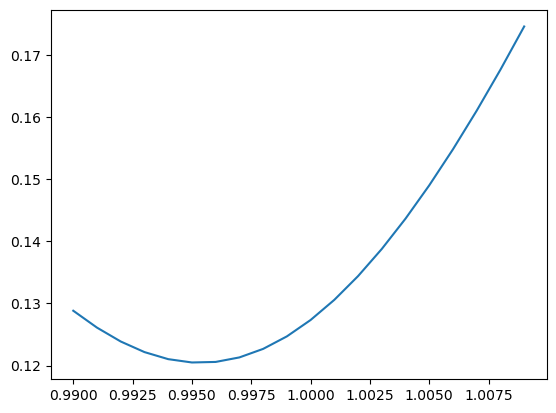

In [28]:
# whole correction
print("weight correction")
W=[(0.990+(i/1000)) for i in range(20)]
S =[]
for w in W:
    error = rmspe(np.expm1(ho_ytest), np.expm1(yhat*w))
    print('RMSPE for {:.3f}:{:.6f}'.format(w,error))
    S.append(error)
Score = pd.Series(S,index=W)
Score.plot()
BS = Score[Score.values == Score.values.min()]
print ('Best weight for Score:{}'.format(BS))

In [29]:
# correction by store
L=range(1115)
W_ho=[]
W_test=[]
for i in L:
    s1 = pd.DataFrame(res[res['Store']==i+1],columns = col_1)
    s2 = pd.DataFrame(xtest[xtest['Store']==i+1])
    W1=[(0.990+(i/1000)) for i in range(20)]
    S =[]
    for w in W1:
        error = rmspe(np.expm1(s1.Sales), np.expm1(s1.Prediction*w))
        S.append(error)
    Score = pd.Series(S,index=W1)
    BS = Score[Score.values == Score.values.min()]
    a=np.array(BS.index.values)
    b_ho=a.repeat(len(s1))
    b_test=a.repeat(len(s2))
    W_ho.extend(b_ho.tolist())
    W_test.extend(b_test.tolist())

In [30]:
yhat_new = yhat*W_ho
error = rmspe(np.expm1(ho_ytest), np.expm1(yhat_new))
print ('RMSPE for weight corretion {:6f}'.format(error))

RMSPE for weight corretion 0.113752


In [31]:
print("Make predictions on the test set")
dtest = xgb.DMatrix(xtest)
test_probs = gbm.predict(dtest)

# model1  kaggle private score 0.12647
result = pd.DataFrame({"Id": test['Id'], 'Sales': np.expm1(test_probs)})
result.to_csv("Rossmann_submission_1.csv", index=False)

# model2 kaggle private score 0.11756
result = pd.DataFrame({"Id": test['Id'], 'Sales': np.expm1(test_probs*0.995)})
result.to_csv("Rossmann_submission_2.csv", index=False)

# model3 kaggle private score 0.11292
result = pd.DataFrame({"Id": test['Id'], 'Sales': np.expm1(test_probs*W_test)})
result.to_csv("Rossmann_submission_3.csv", index=False)

Make predictions on the test set


In [33]:
print(train.tail())

         Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
236455     260          2 2013-01-01      0          0     0      0   
907664     995          2 2013-01-01      0          0     0      0   
237397     261          2 2013-01-01      0          0     0      0   
238339     262          2 2013-01-01  17267       2875     1      0   
1017208   1115          2 2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
236455             a              1         a          a                540.0   
907664             a              1         d          a               6560.0   
237397             a              1         d          c              15340.0   
238339             a              1         b          a               1180.0   
1017208            a              1         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
236455        